<a href="https://colab.research.google.com/github/andrewHosna/dl_ai_project/blob/master/19_sp_dl_ai_digital_clock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spring 2019 Deep Learning and Artificial Intelligence Project
## Andrew Hosna

# Setup and Data Preprocessing

## Import Modules
1. Import the following modules for this project:

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from keras import callbacks
from keras.utils import to_categorical, plot_model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model, load_model


## Google Drive
1. Mount your Google Drive at '/gdrive'

In [9]:
from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## Raw Data
1. Define the directory locations below
2. Create your clean data directory and a model directory
3. Build a list of each 'hour' directory in the raw data directory
4. Confirm that you have all 24 directories

***

**Note:** The rest of this notebook assumes you have the unedited digital clock photos stored in the 'raw_data_dir' you defined above. You can download this data in the correct structure from the following link: https://github.com/andrewHosna/dl_ai_project

In [0]:
raw_data_dir = '/gdrive/My Drive/dl_ai_project/digital_clock_raw_data'
clean_data_dir = '/gdrive/My Drive/dl_ai_project/digital_clock_clean_data'
model_dir = '/gdrive/My Drive/dl_ai_project/models'


In [0]:
try:
    os.mkdir(clean_data_dir)
    os.mkdir(model_dir)
except:
    print("Directory '{}' already exists".format(clean_data_dir))
    

In [11]:
hour_dirs = [raw_data_dir + '/' + dir for dir in os.listdir(raw_data_dir) if os.path.isdir(raw_data_dir + '/' + dir) is True]
print(len(hour_dirs))


24


## Data Preprocessing
1. Iterate over each of the 60 clock images, 1 for each minute, in each of the 24 'hour' directories
2. Crop each image into a rectangle containing the time
3. Resize to 128 px by 256 px and convert to grayscale
4. Crop each image again into two 128 px by 128 px squares, one containing the hour and the other containing the minute
5. Save both of these edited images
6. Visualize every 60 images

***

**Note:**
This process may take awhile. The before and after filename of each newly saved image will be displayed as this process goes on.

In [0]:
for hour_dir in hour_dirs:
    basename = os.path.basename(hour_dir)
    
    try:
        hour_index = basename.index("am")
    except:
        hour_index = basename.index("pm")
        
    hh = int(basename[:hour_index])
    xm = basename[hour_index:]
   
    raw_images = [hour_dir + '/' + file for file in os.listdir(hour_dir) 
                  if os.path.isfile(hour_dir + '/' + file) is True]
    raw_images.sort()
    
    print("{}{} -> {} clock images".format(hh, xm, len(raw_images)))
    
    for mm, raw_image in enumerate(raw_images):
        basename = os.path.basename(raw_image)
        
        ext_index = basename.index(".")
        ext = basename[ext_index:]
        
        window = (1184, 1000, 3104, 1960)
        resize = (256, 128)        
        rename = "{0:02}{1:02}_{2}{3}".format(hh, mm, xm, ext)        
        
        img = Image.open(raw_image)
        img = img.crop(window)
        img = img.convert("L")
        img.thumbnail(resize, Image.ANTIALIAS)
        
        hh_img = img.crop((0, 0, 128, 128))
        mm_img = img.crop((128, 0, 256, 128))
        
        hh_img.save(clean_data_dir + '/' + "hh_" + rename)
        mm_img.save(clean_data_dir + '/' + "mm_" + rename)
        
        print("{} -> hh_{}".format(raw_image, rename))
        print("{} -> mm_{}".format(raw_image, rename))

        if mm % 60 == 0:    
            plt.matshow(np.array(hh_img), cmap='gray')
            plt.matshow(np.array(mm_img), cmap='gray')
            plt.show()


## Dataset
1. Create a list of hour images and a list of minute images
2. Convert each image in each list into a numpy array
3. Generate labels for every image
4. Visualize 10 images to confirm that the labels that you generated are correct 

***

**Note:** This process may take awhile. The filename of each image will be displayed after it has been converted to a numpy array and appended to its dataset list so you know that this process hasn't timed out.

In [0]:
hour_images = [clean_data_dir + '/' + file for file in os.listdir(clean_data_dir)
                if os.path.isfile(clean_data_dir + '/' + file) is True and file[0:2] == "hh"]
minute_images = [clean_data_dir + '/' + file for file in os.listdir(clean_data_dir)
                if os.path.isfile(clean_data_dir + '/' + file) is True and file[0:2] == "mm"]


In [13]:
dataset_hour_images = []

for hour_image in hour_images:
    img = Image.open(hour_image)
    img.load()
    img = np.array(img)
    dataset_hour_images.append(img)
    print(hour_image)
    
dataset_hour_labels = [int(os.path.basename(hour_image)[3:5]) for hour_image in hour_images]

dataset_minute_images = []

for minute_image in minute_images:
    img = Image.open(minute_image)
    img.load()
    img = np.array(img)
    dataset_minute_images.append(img)
    print(minute_image)

dataset_minute_labels = [int(os.path.basename(minute_image)[5:7]) for minute_image in minute_images]


/gdrive/My Drive/dl_ai_project/digital_clock_clean_data/hh_1040_pm.JPG
/gdrive/My Drive/dl_ai_project/digital_clock_clean_data/hh_1041_pm.JPG
/gdrive/My Drive/dl_ai_project/digital_clock_clean_data/hh_1042_pm.JPG
/gdrive/My Drive/dl_ai_project/digital_clock_clean_data/hh_1043_pm.JPG
/gdrive/My Drive/dl_ai_project/digital_clock_clean_data/hh_1044_pm.JPG
/gdrive/My Drive/dl_ai_project/digital_clock_clean_data/hh_1045_pm.JPG
/gdrive/My Drive/dl_ai_project/digital_clock_clean_data/hh_1046_pm.JPG
/gdrive/My Drive/dl_ai_project/digital_clock_clean_data/hh_1047_pm.JPG
/gdrive/My Drive/dl_ai_project/digital_clock_clean_data/hh_1048_pm.JPG
/gdrive/My Drive/dl_ai_project/digital_clock_clean_data/hh_1049_pm.JPG
/gdrive/My Drive/dl_ai_project/digital_clock_clean_data/hh_1050_pm.JPG
/gdrive/My Drive/dl_ai_project/digital_clock_clean_data/hh_1051_pm.JPG
/gdrive/My Drive/dl_ai_project/digital_clock_clean_data/hh_1052_pm.JPG
/gdrive/My Drive/dl_ai_project/digital_clock_clean_data/hh_1053_pm.JPG
/gdriv

Time: 10:40


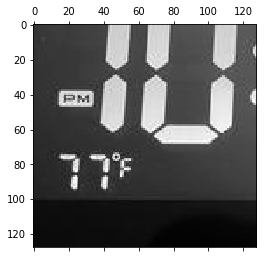

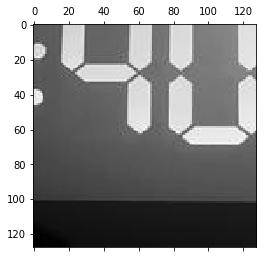

Time: 10:41


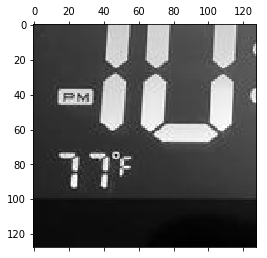

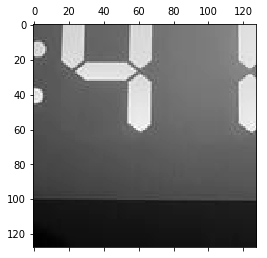

Time: 10:42


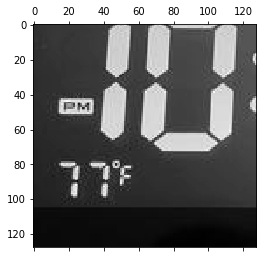

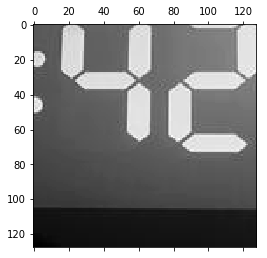

Time: 10:43


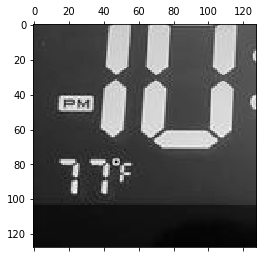

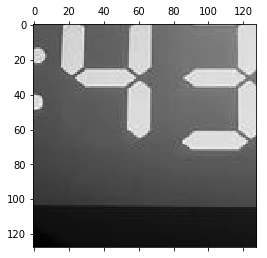

Time: 10:44


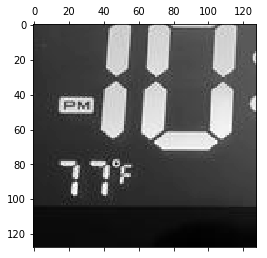

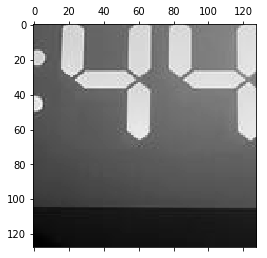

Time: 10:45


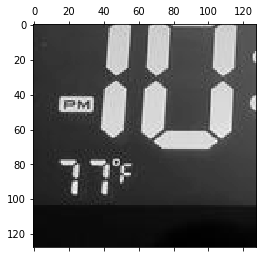

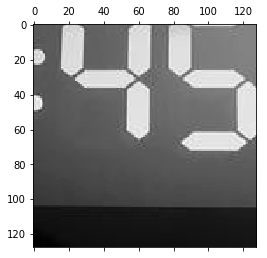

Time: 10:46


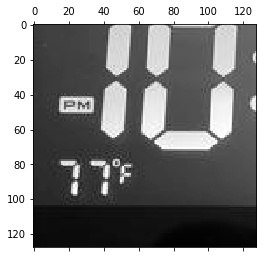

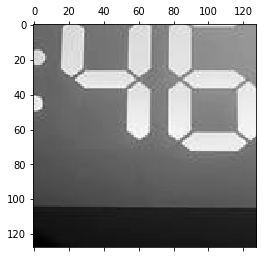

Time: 10:47


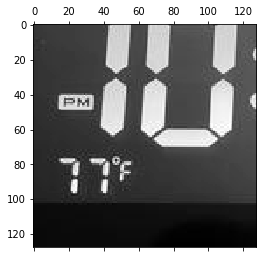

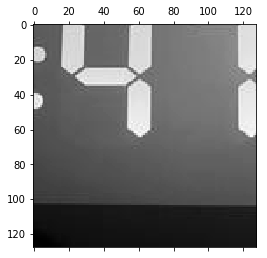

Time: 10:48


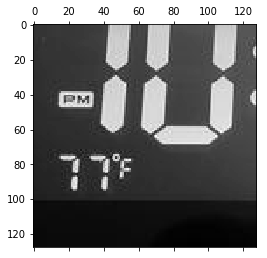

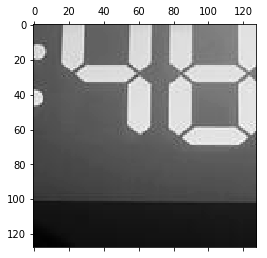

Time: 10:49


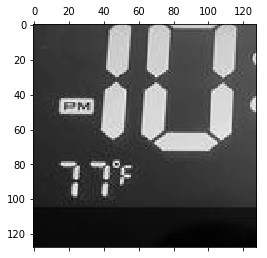

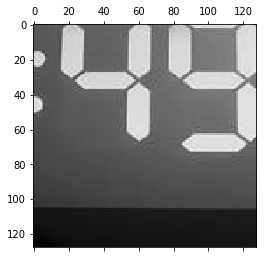

In [14]:
for i in range(10):
    print("Time: {0:02}:{1:02}".format(dataset_hour_labels[i], dataset_minute_labels[i]))
    plt.matshow(dataset_hour_images[i], cmap='gray')
    plt.matshow(dataset_minute_images[i], cmap='gray')
    plt.show()


## More Data Preprocessing
1. Convert each dataset to a numpy array
2. Reshape each tensor and rescale the pixels in each image
3. Confirm the shape of each dataset


In [15]:
num_data = len(dataset_hour_images)
height = 128
width = 128
depth = 1

dataset_hour_images = np.array(dataset_hour_images)
dataset_hour_images = dataset_hour_images.reshape((num_data, height, width, depth))
dataset_hour_images = dataset_hour_images.astype('float32') / 255.0

dataset_minute_images = np.array(dataset_minute_images)
dataset_minute_images = dataset_minute_images.reshape((num_data, height, width, depth))
dataset_minute_images = dataset_minute_images.astype('float32') / 255.0

print(dataset_hour_images.shape)
print(dataset_minute_images.shape)


(1440, 128, 128, 1)
(1440, 128, 128, 1)


## Split Data
1. Randomly split the hour images and labels into a training set and a test set
2. Randomly split this test set in half to obtain a validation set
3. Repeat for the minute images
4. Check the size of all data sets

In [16]:
train_hour_images, test_hour_images, train_hour_labels, test_hour_labels = train_test_split(dataset_hour_images, dataset_hour_labels, test_size=0.3, random_state=24)
test_hour_images, val_hour_images, test_hour_labels, val_hour_labels = train_test_split(test_hour_images, test_hour_labels, test_size=0.5, random_state=24)

train_minute_images, test_minute_images, train_minute_labels, test_minute_labels = train_test_split(dataset_minute_images, dataset_minute_labels, test_size=0.3, random_state=24)
test_minute_images, val_minute_images, test_minute_labels, val_minute_labels = train_test_split(test_minute_images, test_minute_labels, test_size=0.5, random_state=24)

print("Hours\nTraining set: {}\nValidation set: {}\nTest set: {}".format(len(train_hour_images), len(val_hour_images), len(test_hour_images)))
print("Minutes\nTraining set: {}\nValidation set: {}\nTest set: {}".format(len(train_minute_images), len(val_minute_images), len(test_minute_images)))


Hours
Training set: 1008
Validation set: 216
Test set: 216
Minutes
Training set: 1008
Validation set: 216
Test set: 216


## Labels
1. Convert each list of labels to a numpy array
2. Transform each hour and minute label into a vector representing the number
3. Confirm the shapes of each array of labels

In [17]:
train_hour_labels = to_categorical(train_hour_labels)
train_minute_labels = to_categorical(train_minute_labels)

print("Training Hour Labels: {}".format(train_hour_labels.shape))
print("Training Minute Lables: {}".format(train_minute_labels.shape))

val_hour_labels = to_categorical(val_hour_labels)
val_minute_labels = to_categorical(val_minute_labels)

print("Validation Hour Labels: {}".format(val_hour_labels.shape))
print("Validation Minute Lables: {}".format(val_minute_labels.shape))

test_hour_labels = to_categorical(test_hour_labels)
test_minute_labels = to_categorical(test_minute_labels)

print("Test Hour Labels: {}".format(test_hour_labels.shape))
print("Test Minute Labels: {}".format(test_minute_labels.shape))


Training Hour Labels: (1008, 13)
Training Minute Lables: (1008, 60)
Validation Hour Labels: (216, 13)
Validation Minute Lables: (216, 60)
Test Hour Labels: (216, 13)
Test Minute Labels: (216, 60)


# Training Multi-input, Multi-output Models Using the Keras Functional API

**Note:** If you compile any model more than once you will need the change the values being monitored in the callback functions.

## Model 1
### Single Conv2D Layer


In [18]:
time_input = Input(shape=(128, 128, 1))
x = Conv2D(64, (3, 3), activation='relu')(time_input)
output = Flatten()(x)

base_model_1 = Model(time_input, output)

hour_input = Input(shape=(128, 128, 1))
minute_input = Input(shape=(128, 128, 1))

time_1 = base_model_1(hour_input) 
hour = Dense(13, activation='softmax')(time_1)

time_2 = base_model_1(minute_input) 
minute = Dense(60, activation='softmax')(time_2)

model_1 = Model([hour_input, minute_input], [hour, minute])

base_model_1.summary()
model_1.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 64)      640       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1016064)           0         
Total params: 640
Trainable params: 640
Non-trainable params: 0
_________________________________________________________________
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 1)  0                                            
_______________________________________

In [0]:
base_1_img = model_dir + '/' + 'base_1.png'
model_1_img = model_dir + '/' + 'model_1.png'

plot_model(base_model_1, to_file=base_1_img)
plot_model(model_1, to_file=model_1_img)


In [20]:
model_1_path = model_dir + '/' + 'model_1.h5'

minute_checkpoint = callbacks.ModelCheckpoint(filepath=model_1_path, monitor='val_dense_2_acc', verbose=1, save_best_only=True)
early_stop = callbacks.EarlyStopping(monitor='val_dense_2_acc', patience=20, verbose=1)
reduce_lrop = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

call_back = [minute_checkpoint, early_stop, reduce_lrop]

model_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history_1 = model_1.fit([train_hour_images, train_minute_images], [train_hour_labels, train_minute_labels], epochs=100, batch_size=16, 
                       validation_data=([val_hour_images, val_minute_images], [val_hour_labels, val_minute_labels]), callbacks=call_back)


Instructions for updating:
Use tf.cast instead.
Train on 1008 samples, validate on 216 samples
Epoch 1/100
1008/1008 [==============================] - 13s 13ms/step - loss: 5.8198 - dense_1_loss: 1.6628 - dense_2_loss: 4.1570 - dense_1_acc: 0.6280 - dense_2_acc: 0.0188 - val_loss: 4.6170 - val_dense_1_loss: 0.5826 - val_dense_2_loss: 4.0345 - val_dense_1_acc: 0.8981 - val_dense_2_acc: 0.0185

Epoch 00001: val_dense_2_acc improved from -inf to 0.01852, saving model to /gdrive/My Drive/dl_ai_project/models/model_1.h5
Epoch 2/100
1008/1008 [==============================] - 10s 10ms/step - loss: 3.8591 - dense_1_loss: 0.3018 - dense_2_loss: 3.5573 - dense_1_acc: 0.9623 - dense_2_acc: 0.0942 - val_loss: 3.7948 - val_dense_1_loss: 0.1968 - val_dense_2_loss: 3.5980 - val_dense_1_acc: 0.9861 - val_dense_2_acc: 0.0741

Epoch 00002: val_dense_2_acc improved from 0.01852 to 0.07407, saving model to /gdrive/My Drive/dl_ai_project/models/model_1.h5
Epoch 3/100
1008/1008 [=========================

## Model 2
### Two Conv2D Layers Followed by a MaxPooling2D Layer

In [24]:
time_input = Input(shape=(128, 128, 1))
x = Conv2D(64, (3, 3), activation='relu')(time_input)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)
output = Flatten()(x)

base_model_2 = Model(time_input, output)

hour_input = Input(shape=(128, 128, 1))
minute_input = Input(shape=(128, 128, 1))

time_1 = base_model_2(hour_input) 
hour = Dense(13, activation='softmax')(time_1)

time_2 = base_model_2(minute_input) 
minute = Dense(60, activation='softmax')(time_2)

model_2 = Model([hour_input, minute_input], [hour, minute])

base_model_2.summary()
model_2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 64)      640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 246016)            0         
Total params: 37,568
Trainable params: 37,568
Non-trainable params: 0
_________________________________________________________________
__________________________________________________________________________________________________
Layer (type)                    Output 

In [0]:
base_2_img = model_dir + '/' + 'base_2.png'
model_2_img = model_dir + '/' + 'model_2.png'

plot_model(base_model_2, to_file=base_2_img)
plot_model(model_2, to_file=model_2_img)


In [26]:
model_2_path = model_dir + '/' + 'model_2.h5'

minute_checkpoint = callbacks.ModelCheckpoint(filepath=model_2_path, monitor='val_dense_4_acc', verbose=1, save_best_only=True)
early_stop = callbacks.EarlyStopping(monitor='val_dense_4_acc', patience=20, verbose=1)
reduce_lrop = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

call_back = [minute_checkpoint, early_stop, reduce_lrop]

model_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history_2 = model_2.fit([train_hour_images, train_minute_images], [train_hour_labels, train_minute_labels], epochs=100, batch_size=16, 
                        validation_data=([val_hour_images, val_minute_images], [val_hour_labels, val_minute_labels]), callbacks=call_back)


Train on 1008 samples, validate on 216 samples
Epoch 1/100
1008/1008 [==============================] - 9s 9ms/step - loss: 5.9950 - dense_3_loss: 1.8315 - dense_4_loss: 4.1635 - dense_3_acc: 0.5119 - dense_4_acc: 0.0159 - val_loss: 4.7126 - val_dense_3_loss: 0.7507 - val_dense_4_loss: 3.9619 - val_dense_3_acc: 0.8611 - val_dense_4_acc: 0.0787

Epoch 00001: val_dense_4_acc improved from -inf to 0.07870, saving model to /gdrive/My Drive/dl_ai_project/models/model_2.h5
Epoch 2/100
1008/1008 [==============================] - 7s 7ms/step - loss: 3.9185 - dense_3_loss: 0.3250 - dense_4_loss: 3.5935 - dense_3_acc: 0.9504 - dense_4_acc: 0.1141 - val_loss: 3.5373 - val_dense_3_loss: 0.1666 - val_dense_4_loss: 3.3707 - val_dense_3_acc: 0.9861 - val_dense_4_acc: 0.0880

Epoch 00002: val_dense_4_acc improved from 0.07870 to 0.08796, saving model to /gdrive/My Drive/dl_ai_project/models/model_2.h5
Epoch 3/100
1008/1008 [==============================] - 7s 7ms/step - loss: 2.5552 - dense_3_loss: 

## Model 3
### Groups of Conv2D Layers Each Followed by a MaxPooling2D Layer

In [29]:
time_input = Input(shape=(128, 128, 1))
x = Conv2D(128, (3, 3), activation='relu')(time_input)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
output = Flatten()(x)

base_model_3 = Model(time_input, output)

hour_input = Input(shape=(128, 128, 1))
minute_input = Input(shape=(128, 128, 1))

time_1 = base_model_3(hour_input) 
hour = Dense(13, activation='softmax')(time_1)

time_2 = base_model_3(minute_input) 
minute = Dense(60, activation='softmax')(time_2)

model_3 = Model([hour_input, minute_input], [hour, minute])

base_model_3.summary()
model_3.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 126, 126, 128)     1280      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 124, 124, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 64)        73792     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 58, 58, 64)        36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        36928     
__________

In [0]:
base_3_img = model_dir + '/' + 'base_3.png'
model_3_img = model_dir + '/' + 'model_3.png'

plot_model(base_model_3, to_file=base_3_img)
plot_model(model_3, to_file=model_3_img)


In [31]:
model_3_path = model_dir + '/' + 'model_3.h5'

minute_checkpoint = callbacks.ModelCheckpoint(filepath=model_3_path, monitor='val_dense_6_acc', verbose=1, save_best_only=True)
early_stop = callbacks.EarlyStopping(monitor='val_dense_6_acc', patience=20, verbose=1)
reduce_lrop = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

call_back = [minute_checkpoint, early_stop, reduce_lrop]

model_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history_3 = model_3.fit([train_hour_images, train_minute_images], [train_hour_labels, train_minute_labels], epochs=100, batch_size=16, 
                        validation_data=([val_hour_images, val_minute_images], [val_hour_labels, val_minute_labels]), callbacks=call_back)


Train on 1008 samples, validate on 216 samples
Epoch 1/100
1008/1008 [==============================] - 20s 20ms/step - loss: 6.6581 - dense_5_loss: 2.5633 - dense_6_loss: 4.0947 - dense_5_acc: 0.0645 - dense_6_acc: 0.0159 - val_loss: 6.6559 - val_dense_5_loss: 2.5609 - val_dense_6_loss: 4.0950 - val_dense_5_acc: 0.1065 - val_dense_6_acc: 0.0139

Epoch 00001: val_dense_6_acc improved from -inf to 0.01389, saving model to /gdrive/My Drive/dl_ai_project/models/model_3.h5
Epoch 2/100
1008/1008 [==============================] - 17s 17ms/step - loss: 6.6526 - dense_5_loss: 2.5579 - dense_6_loss: 4.0947 - dense_5_acc: 0.1091 - dense_6_acc: 0.0060 - val_loss: 6.6537 - val_dense_5_loss: 2.5578 - val_dense_6_loss: 4.0959 - val_dense_5_acc: 0.1157 - val_dense_6_acc: 0.0278

Epoch 00002: val_dense_6_acc improved from 0.01389 to 0.02778, saving model to /gdrive/My Drive/dl_ai_project/models/model_3.h5
Epoch 3/100
1008/1008 [==============================] - 17s 16ms/step - loss: 6.6479 - dense_5_

## Model 4
### Simple Residual Network

In [34]:
from keras.layers import BatchNormalization, ReLU, Add, Dropout

time_input = Input(shape=(128, 128, 1))
x = BatchNormalization()(time_input)
x = ReLU()(x)
x = Conv2D(32, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(1, (3, 3), padding="same")(x)
out1 = Add()([time_input, x])

x = BatchNormalization()(out1)
x = ReLU()(x)
x = Conv2D(64, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(1, (3, 3), padding="same")(x)
out2 = Add()([out1, x])

x = BatchNormalization()(out2)
x = ReLU()(x)
x = Conv2D(128, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(1, (3, 3), padding="same")(x)
out3 = Add()([out2, x])

x = BatchNormalization()(out3)
x = ReLU()(x)
x = Dropout(0.25)(x)

x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)

base_model_4 = Model(time_input, x)

hour_input = Input(shape=(128, 128, 1))
minute_input = Input(shape=(128, 128, 1))

time_1 = base_model_4(hour_input) 
hour = Dense(13, activation='softmax')(time_1)

time_2 = base_model_4(minute_input) 
minute = Dense(60, activation='softmax')(time_2)

model_4 = Model([hour_input, minute_input], [hour, minute])

base_model_4.summary()
model_4.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 1)  4           input_10[0][0]                   
__________________________________________________________________________________________________
re_lu_1 (ReLU)                  (None, 128, 128, 1)  0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 128, 128, 32) 320         re_lu_1[0][0]               

In [0]:
base_4_img = model_dir + '/' + 'base_4.png'
model_4_img = model_dir + '/' + 'model_4.png'

plot_model(base_model_4, to_file=base_4_img)
plot_model(model_4, to_file=model_4_img)


In [36]:
model_4_path = model_dir + '/' + 'model_4.h5'

minute_checkpoint = callbacks.ModelCheckpoint(filepath=model_4_path, monitor='val_dense_8_acc', verbose=1, save_best_only=True)
early_stop = callbacks.EarlyStopping(monitor='val_dense_8_acc', patience=20, verbose=1)
reduce_lrop = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

call_back = [minute_checkpoint, early_stop, reduce_lrop]

model_4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history_4 = model_4.fit([train_hour_images, train_minute_images], [train_hour_labels, train_minute_labels], epochs=100, batch_size=16, 
                        validation_data=([val_hour_images, val_minute_images], [val_hour_labels, val_minute_labels]), callbacks=call_back)

Train on 1008 samples, validate on 216 samples
Epoch 1/100
1008/1008 [==============================] - 19s 19ms/step - loss: 4.7651 - dense_7_loss: 0.6552 - dense_8_loss: 4.1099 - dense_7_acc: 0.8413 - dense_8_acc: 0.0724 - val_loss: 5.2518 - val_dense_7_loss: 1.5024 - val_dense_8_loss: 3.7494 - val_dense_7_acc: 0.9815 - val_dense_8_acc: 0.1250

Epoch 00001: val_dense_8_acc improved from -inf to 0.12500, saving model to /gdrive/My Drive/dl_ai_project/models/model_4.h5
Epoch 2/100
1008/1008 [==============================] - 14s 14ms/step - loss: 2.7142 - dense_7_loss: 0.0597 - dense_8_loss: 2.6545 - dense_7_acc: 0.9911 - dense_8_acc: 0.2857 - val_loss: 3.0966 - val_dense_7_loss: 0.0950 - val_dense_8_loss: 3.0016 - val_dense_7_acc: 0.9907 - val_dense_8_acc: 0.2269

Epoch 00002: val_dense_8_acc improved from 0.12500 to 0.22685, saving model to /gdrive/My Drive/dl_ai_project/models/model_4.h5
Epoch 3/100
1008/1008 [==============================] - 14s 14ms/step - loss: 1.8529 - dense_7_

# Evaluating the Models

## Functions
1. Define the following functions to reuse when evalutating each model

In [0]:
def model_accuracy(history, train_acc, val_acc, num):
    plt.plot(history.history[train_acc[0]])
    plt.plot(history.history[train_acc[1]])
    plt.plot(history.history[val_acc[0]])
    plt.plot(history.history[val_acc[1]])
    plt.title('Model {} Accuracy'.format(num))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train - hours', 'train - minutes', 'validation - hours', 'validation - minutes'], loc='lower right')
    plt.show()
    
    
def model_loss(history, train_loss, val_loss, num):
    plt.plot(history.history[train_loss[0]])
    plt.plot(history.history[train_loss[1]])
    plt.plot(history.history[val_loss[0]])
    plt.plot(history.history[val_loss[1]])
    plt.title('Model {} Loss'.format(num))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train - hours', 'train - minutes', 'validation - hours', 'validation - minutes'], loc='lower right')
    plt.show()

    
def model_evaluation(model, images, labels):
    stats = model.evaluate(images, labels)
    
    print("Test Data Set")
    print("Loss: {}".format(stats[0]))
    print("Hour Loss: {0:.2f}%".format(stats[1]))
    print("Minute Loss: {0:.2f}%".format(stats[2]))
    print("Hour Accuracy: {0:.2f}%".format(stats[3] * 100))
    print("Minute Accuracy: {0:.2f}%".format(stats[4] * 100))


def model_prediction(model, images, labels):
    predictions = model.predict(images)
    
    for i in range(10):
        print("Time: {0:02}:{1:02}".format(np.argmax(labels[0][i]), np.argmax(labels[1][i])))
        print("Predicted Time: {0:02}:{1:02}".format(np.argmax(predictions[0][i]), np.argmax(predictions[1][i])))
        
        plt.matshow(images[0][i, :, :, 0], cmap='gray')
        plt.matshow(images[1][i, :, :, 0], cmap='gray')
        plt.show()
                  
    time_diff = []

    for i in range(len(labels[0])):
        hour_diff = abs(np.argmax(labels[0][i]) - np.argmax(predictions[0][i]))
        min_diff = abs(np.argmax(labels[1][i]) - np.argmax(predictions[1][i]))
        time_diff.append((60 * hour_diff) + min_diff)
    
    avg_time_diff = sum(time_diff) / len(labels[0])

    print("Predictions off by {0:.1f} minutes on average".format(avg_time_diff))



## Model 1

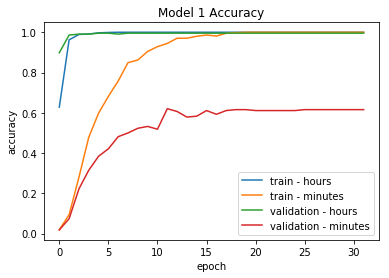

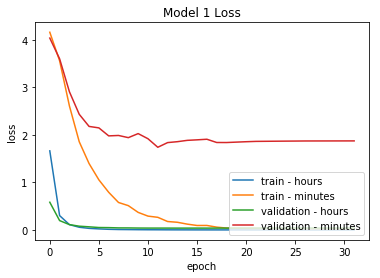

In [22]:
model_accuracy(history_1, ('dense_1_acc', 'dense_2_acc'), ('val_dense_1_acc', 'val_dense_2_acc'),1)
model_loss(history_1, ('dense_1_loss', 'dense_2_loss'), ('val_dense_1_loss', 'val_dense_2_loss'), 1)


216/216 [==============================] - 1s 2ms/step
Test Data Set
Loss: 1.8534541571581806
Hour Loss: 0.08%
Minute Loss: 1.78%
Hour Accuracy: 98.15%
Minute Accuracy: 59.26%
Time: 11:48
Predicted Time: 11:49


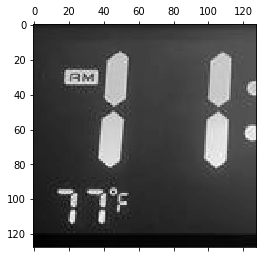

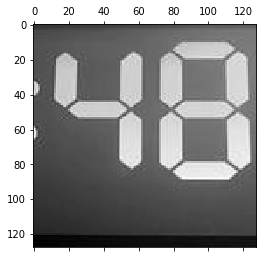

Time: 12:33
Predicted Time: 12:39


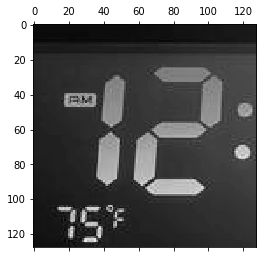

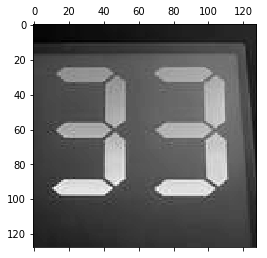

Time: 11:00
Predicted Time: 11:56


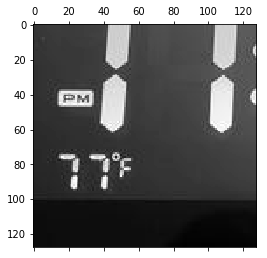

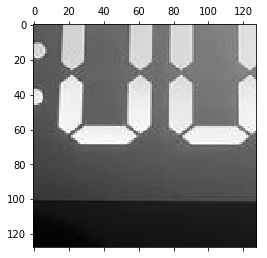

Time: 05:38
Predicted Time: 05:30


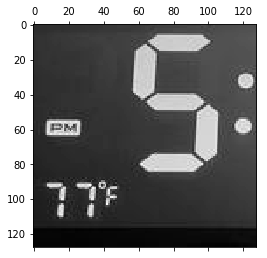

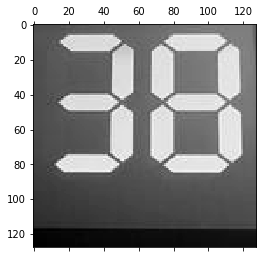

Time: 01:16
Predicted Time: 01:16


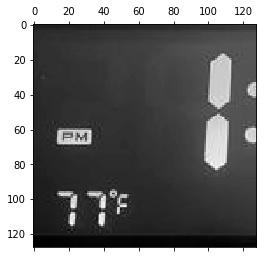

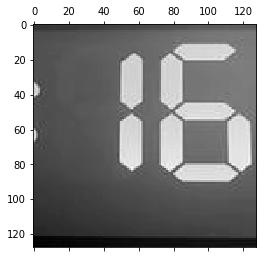

Time: 01:25
Predicted Time: 01:29


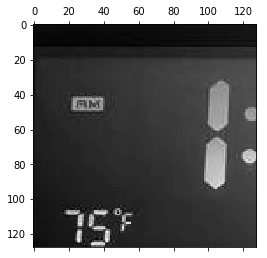

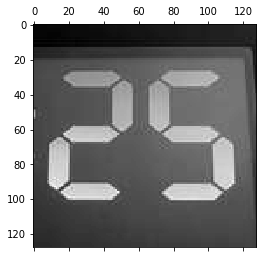

Time: 06:57
Predicted Time: 06:59


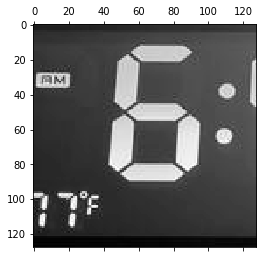

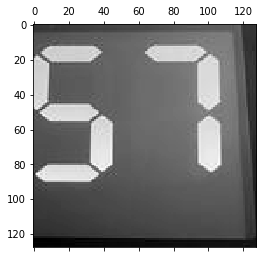

Time: 09:32
Predicted Time: 09:32


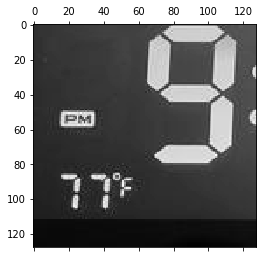

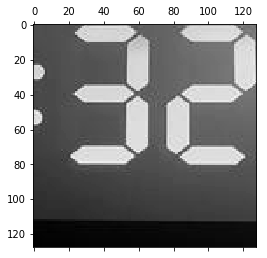

Time: 11:46
Predicted Time: 11:46


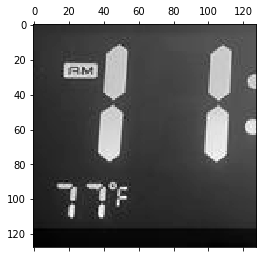

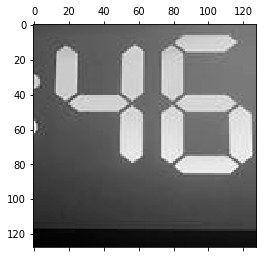

Time: 07:44
Predicted Time: 07:44


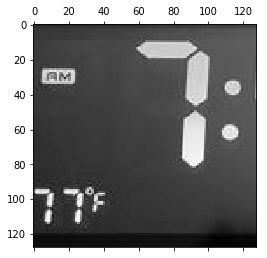

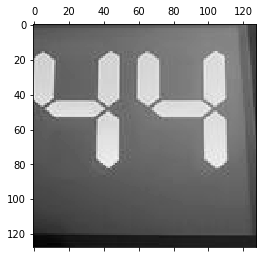

Predictions off by 5.4 minutes on average


In [23]:
model_1 = load_model(model_1_path)

model_evaluation(model_1, [test_hour_images, test_minute_images], [test_hour_labels, test_minute_labels])
model_prediction(model_1, [test_hour_images, test_minute_images], [test_hour_labels, test_minute_labels])


## Model 2

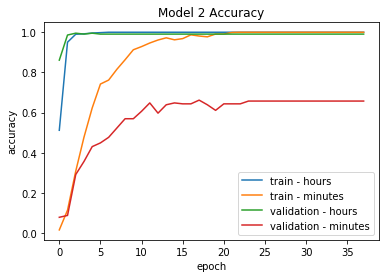

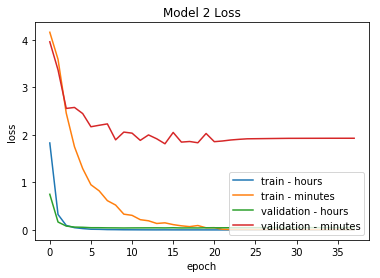

In [27]:
model_accuracy(history_2, ('dense_3_acc', 'dense_4_acc'), ('val_dense_3_acc', 'val_dense_4_acc'), 2)
model_loss(history_2, ('dense_3_loss', 'dense_4_loss'), ('val_dense_3_loss', 'val_dense_4_loss'), 2)


216/216 [==============================] - 1s 6ms/step
Test Data Set
Loss: 2.0289083321889243
Hour Loss: 0.08%
Minute Loss: 1.95%
Hour Accuracy: 98.15%
Minute Accuracy: 65.74%
Time: 11:48
Predicted Time: 11:40


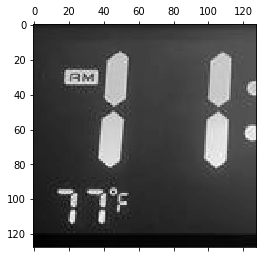

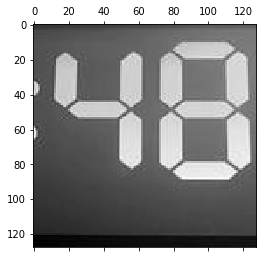

Time: 12:33
Predicted Time: 12:39


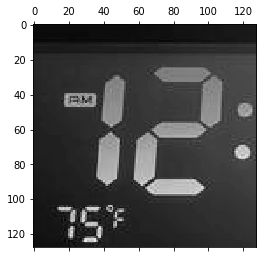

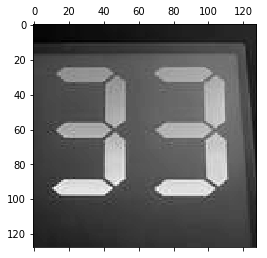

Time: 11:00
Predicted Time: 11:06


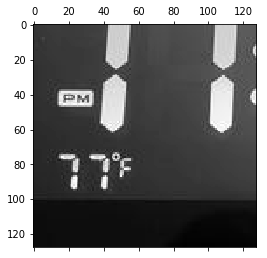

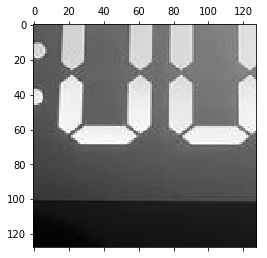

Time: 05:38
Predicted Time: 05:38


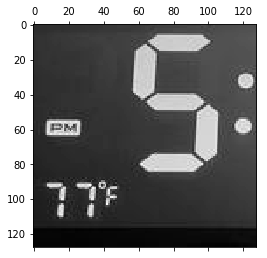

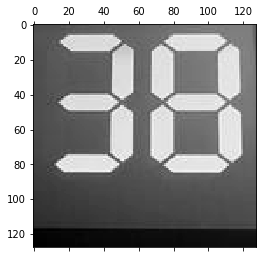

Time: 01:16
Predicted Time: 01:16


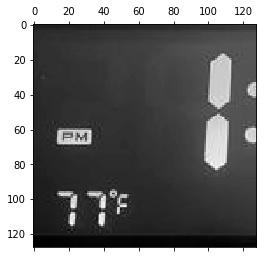

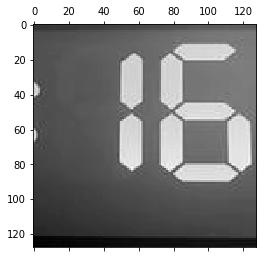

Time: 01:25
Predicted Time: 01:35


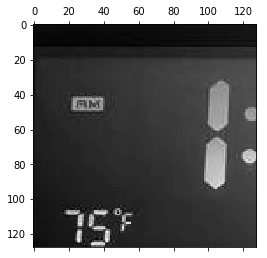

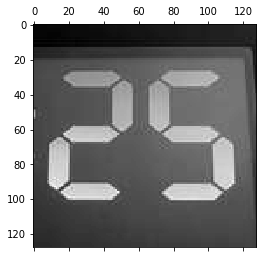

Time: 06:57
Predicted Time: 06:59


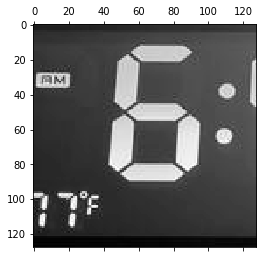

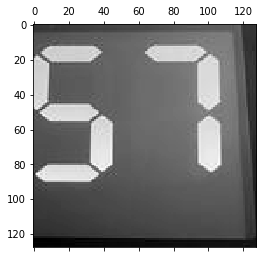

Time: 09:32
Predicted Time: 09:32


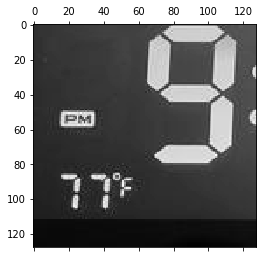

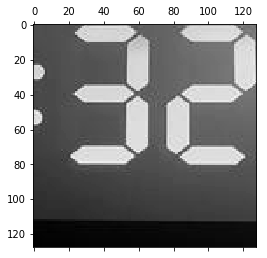

Time: 11:46
Predicted Time: 11:46


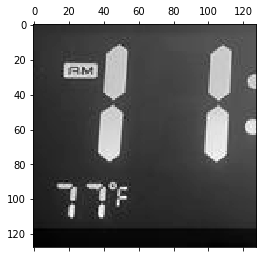

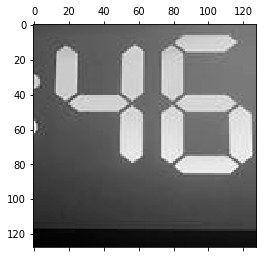

Time: 07:44
Predicted Time: 07:44


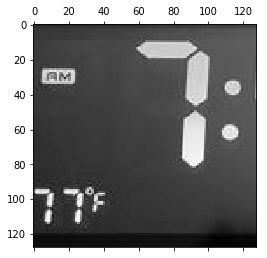

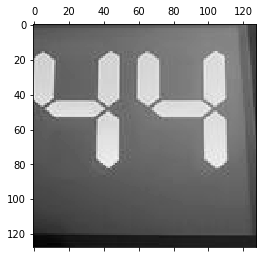

Predictions off by 5.6 minutes on average


In [28]:
model_2 = load_model(model_2_path)

model_evaluation(model_2, [test_hour_images, test_minute_images], [test_hour_labels, test_minute_labels])
model_prediction(model_2, [test_hour_images, test_minute_images], [test_hour_labels, test_minute_labels])


## Model 3

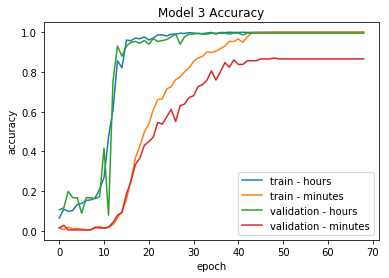

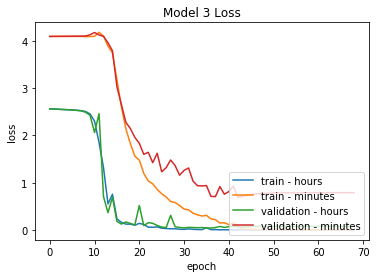

In [32]:
model_accuracy(history_3, ('dense_5_acc', 'dense_6_acc'), ('val_dense_5_acc', 'val_dense_6_acc'), 3)
model_loss(history_3, ('dense_5_loss', 'dense_6_loss'), ('val_dense_5_loss', 'val_dense_6_loss'), 3)


216/216 [==============================] - 4s 20ms/step
Test Data Set
Loss: 0.8320705537442807
Hour Loss: 0.05%
Minute Loss: 0.78%
Hour Accuracy: 99.07%
Minute Accuracy: 88.89%
Time: 11:48
Predicted Time: 11:48


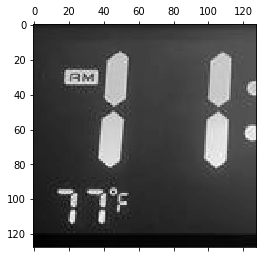

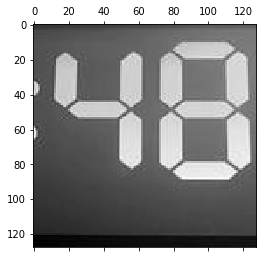

Time: 12:33
Predicted Time: 12:33


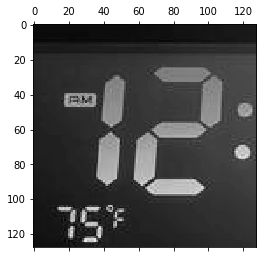

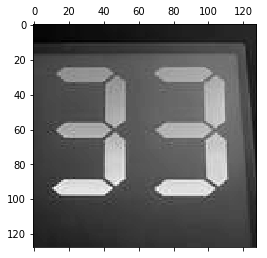

Time: 11:00
Predicted Time: 11:00


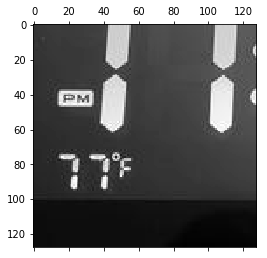

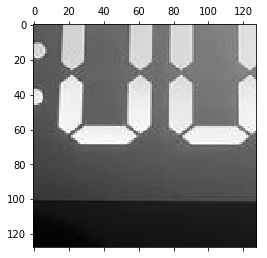

Time: 05:38
Predicted Time: 05:38


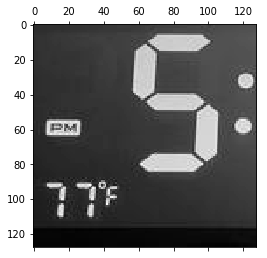

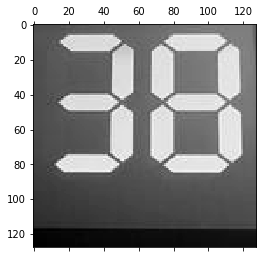

Time: 01:16
Predicted Time: 01:16


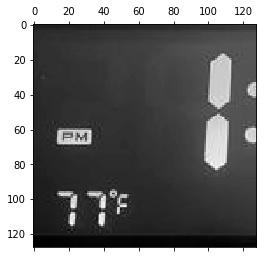

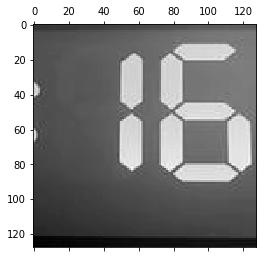

Time: 01:25
Predicted Time: 01:29


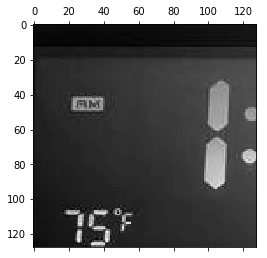

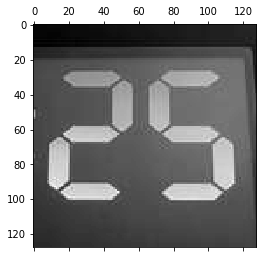

Time: 06:57
Predicted Time: 06:57


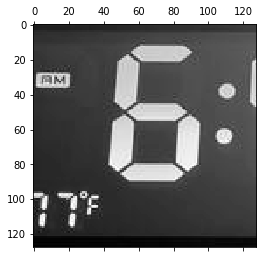

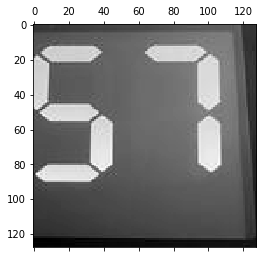

Time: 09:32
Predicted Time: 09:32


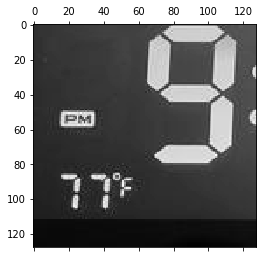

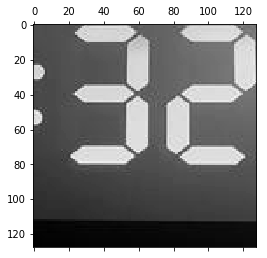

Time: 11:46
Predicted Time: 11:46


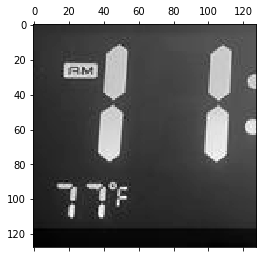

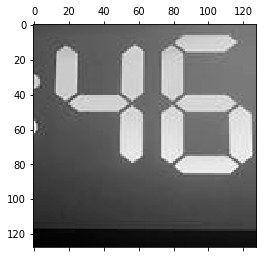

Time: 07:44
Predicted Time: 07:44


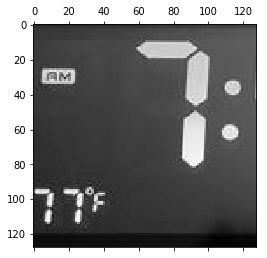

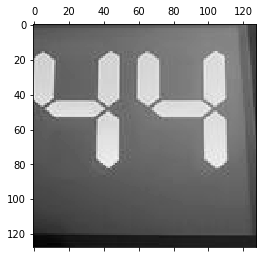

Predictions off by 4.3 minutes on average


In [33]:
model_3 = load_model(model_3_path)

model_evaluation(model_3, [test_hour_images, test_minute_images], [test_hour_labels, test_minute_labels])
model_prediction(model_3, [test_hour_images, test_minute_images], [test_hour_labels, test_minute_labels])


## Model 4

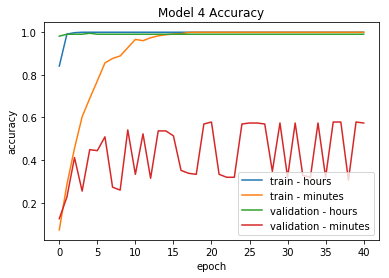

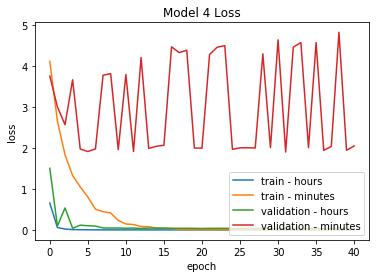

In [37]:
model_accuracy(history_4, ('dense_7_acc', 'dense_8_acc'), ('val_dense_7_acc', 'val_dense_8_acc'), 4)
model_loss(history_4, ('dense_7_loss', 'dense_8_loss'), ('val_dense_7_loss', 'val_dense_8_loss'), 4)


216/216 [==============================] - 3s 16ms/step
Test Data Set
Loss: 1.791107698723122
Hour Loss: 0.08%
Minute Loss: 1.72%
Hour Accuracy: 97.69%
Minute Accuracy: 61.11%
Time: 11:48
Predicted Time: 11:40


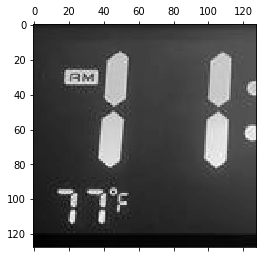

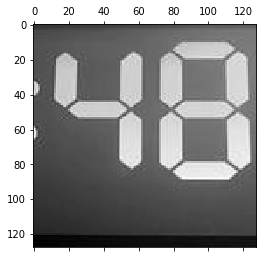

Time: 12:33
Predicted Time: 12:33


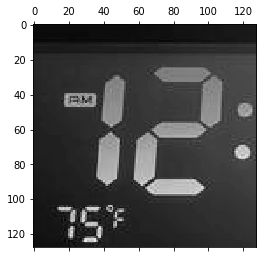

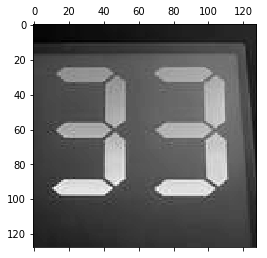

Time: 11:00
Predicted Time: 10:40


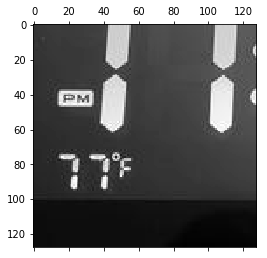

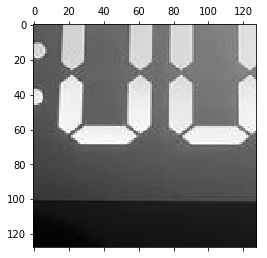

Time: 05:38
Predicted Time: 05:38


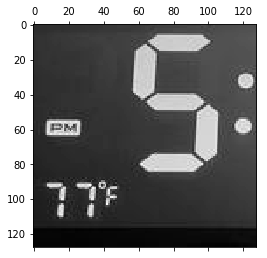

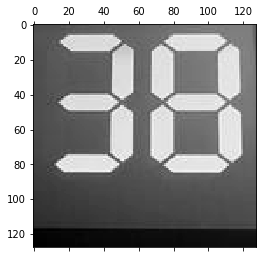

Time: 01:16
Predicted Time: 01:16


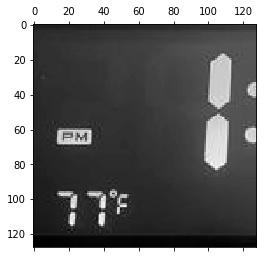

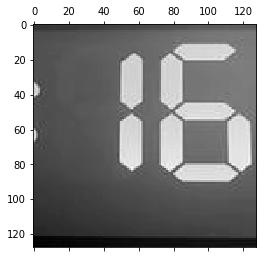

Time: 01:25
Predicted Time: 01:29


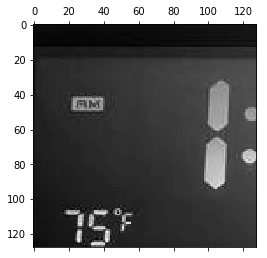

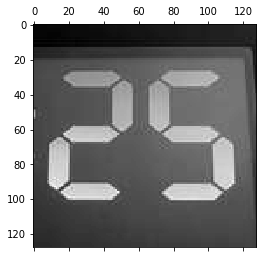

Time: 06:57
Predicted Time: 06:59


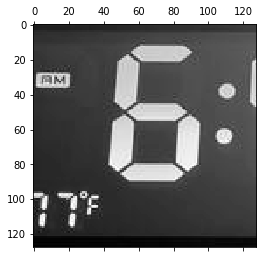

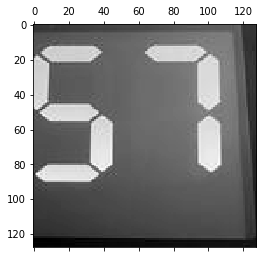

Time: 09:32
Predicted Time: 09:32


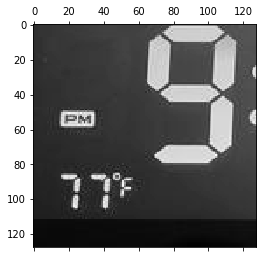

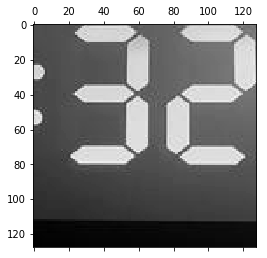

Time: 11:46
Predicted Time: 11:46


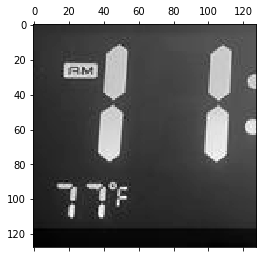

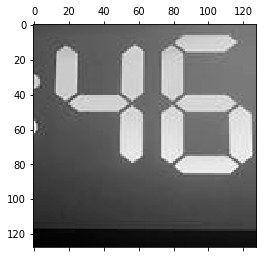

Time: 07:44
Predicted Time: 07:44


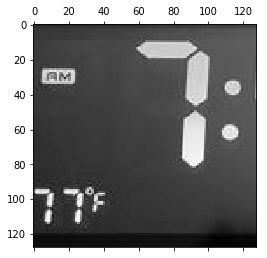

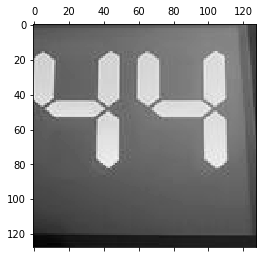

Predictions off by 6.7 minutes on average


In [38]:
model_4 = load_model(model_4_path)

model_evaluation(model_4, [test_hour_images, test_minute_images], [test_hour_labels, test_minute_labels])
model_prediction(model_4, [test_hour_images, test_minute_images], [test_hour_labels, test_minute_labels])
